#  Mercedes-Benz Greener Manufacturing EDA
This notebook uses a dataset from [Kaggle's Mercedes-Benz Greener Manufacturing](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing) competition:
> In this competition, Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing.

## Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
print('Size of training set: {} rows and {} columns'.format(*train.shape))
train.head()

Size of training set: 4209 rows and 378 columns


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


## Target variable

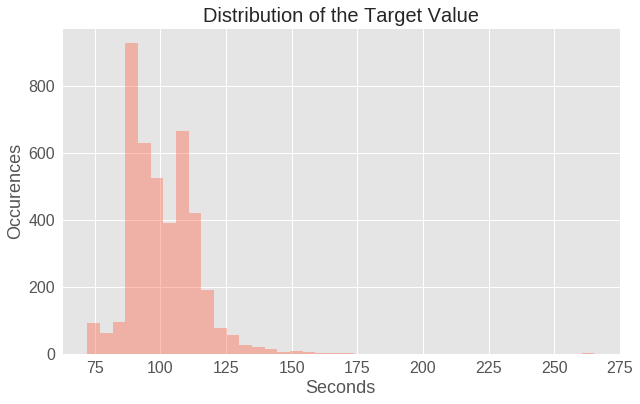

min: 72.11 max: 265.32 mean: 100.67 std: 12.68
Count of values above 180: 1


In [3]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

y_train = train['y'].values
sns.distplot(y_train, bins=40, kde=False, color='tomato')

plt.xlabel('Seconds', fontsize=18)
plt.ylabel('Occurences', fontsize=18)
plt.title('Distribution of the Target Value', fontsize=20)
plt.show()

print('min: {} max: {} mean: {:.2f} std: {:.2f}'.format(
    min(y_train), max(y_train), y_train.mean(), y_train.std()))
print('Count of values above 180: {}'.format(np.sum(y_train > 200)))

## Feature analysis

In [4]:
cols = [c for c in train.columns if 'X' in c]

print('Number of features: {}'.format(len(cols)))

dtype = train.dtypes.reset_index()
dtype.columns = ['Count', 'Column Type']
dtype.groupby('Column Type').aggregate('count').reset_index()

Number of features: 376


,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [5]:
train_counts = [[], [], []]
for c in train.columns:
    c_type = train[c].dtype
    c_unique = len(np.unique(train[c]))
    if c_unique == 1: train_counts[0].append(c)
    elif c_unique == 2 and c_type == np.int64: train_counts[1].append(c)
    else: train_counts[2].append(c)

print('Features in the train set: {} constant, {} binary, {} categorical \n'.format(
    *[len(c) for c in train_counts]))
print('Constant features:', train_counts[0])
print('Categorical features:', train_counts[2])

Features in the train set: 12 constant, 356 binary, 10 categorical 

Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Categorical features: ['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [6]:
test = pd.read_csv('test.csv')
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
test_counts = [[], [], []]
for c in test.columns:
    c_type = test[c].dtype
    c_unique = len(np.unique(test[c]))
    if c_unique == 1: test_counts[0].append(c)
    elif c_unique == 2 and c_type == np.int64: test_counts[1].append(c)
    else: test_counts[2].append(c)

print('Features in the test set: {} constant, {} binary, {} categorical'.format(
    *[len(c) for c in test_counts]))
print('Constant features:', test_counts[0])
print('Categorical features:', test_counts[2])

Features in the test set: 5 constant, 363 binary, 9 categorical
Constant features: ['X257', 'X258', 'X295', 'X296', 'X369']
Categorical features: ['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [8]:
set(train_counts[0]).intersection(test_counts[0])

set()

In [9]:
set(train_counts[2]).intersection(test_counts[2])

{'ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'}

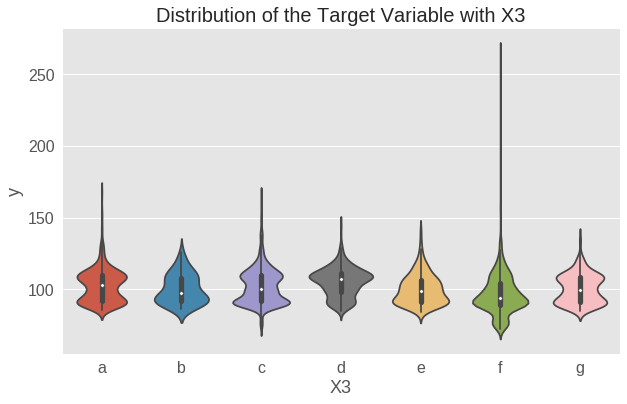

In [10]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

var_name = 'X3'
col_order = np.sort(train[var_name].unique()).tolist()

sns.violinplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title('Distribution of the Target Variable with ' + var_name, fontsize=20)
plt.show()